In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.special import expit
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [7]:
# Checking URL of Advanced Stats
url = "https://www.basketball-reference.com/leagues/NBA_2021_advanced.html"
print(url)
html = urlopen(url)
bs = BeautifulSoup(html.read(), 'lxml')
tables = bs.find_all('table',{"class":"sortable"})
stat_tables = pd.read_html(str(tables))
stat_tables[0]
adv = stats_tables[0][:-1]
adv

https://www.basketball-reference.com/leagues/NBA_2021_advanced.html


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,NaN,0.3,1.0,1.3,.085,NaN,-3.5,-0.9,-4.5,-0.5
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,NaN,-0.1,0.0,-0.1,-0.252,NaN,-14.9,-5.0,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,NaN,2.3,1.7,4.0,.119,NaN,-0.3,-0.5,-0.8,0.5
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,NaN,5.6,3.2,8.8,.197,NaN,2.9,1.9,4.7,3.6
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,NaN,0.5,0.6,1.1,.080,NaN,-0.2,-0.4,-0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,NaN,0.8,0.5,1.3,.092,NaN,0.2,0.6,0.8,0.5
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,NaN,2.8,2.2,5.1,.147,NaN,2.0,1.2,3.2,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,NaN,5.9,1.3,7.2,.163,NaN,5.4,-1.7,3.6,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,...,NaN,2.1,1.1,3.3,.156,NaN,-0.2,-0.1,-0.3,0.4


NameError: name 'stats_tables' is not defined

In [10]:
# Advanced Stats Scrape
def adv_scrape(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + year + "_advanced.html"
    print(url)
    html = urlopen(url)
    bs = BeautifulSoup(html.read(), 'lxml')
    tables = bs.find_all('table',{"class":"sortable"})
    stat_tables = pd.read_html(str(tables))
    stat_tables[0]
    adv = pd.DataFrame(stat_tables[0][:-1])
    adv['Season'] = year
    return(adv)

adv_scrape("2021")

https://www.basketball-reference.com/leagues/NBA_2021_advanced.html


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Season
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,0.3,1.0,1.3,.085,NaN,-3.5,-0.9,-4.5,-0.5,2021
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,-0.1,0.0,-0.1,-0.252,NaN,-14.9,-5.0,-19.8,-0.1,2021
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,2.3,1.7,4.0,.119,NaN,-0.3,-0.5,-0.8,0.5,2021
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,5.6,3.2,8.8,.197,NaN,2.9,1.9,4.7,3.6,2021
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,0.5,0.6,1.1,.080,NaN,-0.2,-0.4,-0.6,0.2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,536,Delon Wright,SG,28,DET,36,1052,16.5,.562,.304,...,1.7,1.3,2.9,.134,NaN,1.1,1.8,2.8,1.3,2021
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,0.8,0.5,1.3,.092,NaN,0.2,0.6,0.8,0.5,2021
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,2.8,2.2,5.1,.147,NaN,2.0,1.2,3.2,2.2,2021
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,5.9,1.3,7.2,.163,NaN,5.4,-1.7,3.6,3.0,2021


In [16]:
# Advanced Stats Scrape Loop
final_data=pd.DataFrame()
years=np.array(["2021","2020","2019","2018","2017"])
for year_id in years:
    data = adv_scrape(year_id)
    time.sleep(np.random.uniform(0,5))
    final_data = pd.concat([final_data,data])
    
final_data
#final_data.to_csv("nba_advanced_2017_2021.csv")

https://www.basketball-reference.com/leagues/NBA_2021_advanced.html
https://www.basketball-reference.com/leagues/NBA_2020_advanced.html
https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
https://www.basketball-reference.com/leagues/NBA_2018_advanced.html
https://www.basketball-reference.com/leagues/NBA_2017_advanced.html


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Season
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,0.3,1.0,1.3,.085,NaN,-3.5,-0.9,-4.5,-0.5,2021
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,-0.1,0.0,-0.1,-0.252,NaN,-14.9,-5.0,-19.8,-0.1,2021
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,2.3,1.7,4.0,.119,NaN,-0.3,-0.5,-0.8,0.5,2021
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,5.6,3.2,8.8,.197,NaN,2.9,1.9,4.7,3.6,2021
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,0.5,0.6,1.1,.080,NaN,-0.2,-0.4,-0.6,0.2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,481,Thaddeus Young,PF,28,IND,74,2237,14.9,.562,.172,...,2.0,2.7,4.6,.100,NaN,-0.3,0.8,0.5,1.4,2017
614,482,Cody Zeller,C,24,CHO,62,1725,16.7,.604,.002,...,3.4,2.2,5.6,.157,NaN,-0.9,1.1,0.2,1.0,2017
615,483,Tyler Zeller,C,27,BOS,51,525,13.0,.508,.006,...,0.5,0.6,1.0,.094,NaN,-2.2,-0.2,-2.4,0.0,2017
616,484,Stephen Zimmerman,C,20,ORL,19,108,7.3,.346,.000,...,-0.1,0.1,0.0,-0.005,NaN,-6.6,-1.7,-8.3,-0.2,2017


In [7]:
# Read back in data
data = pd.read_csv("nba_advanced_2017_2021.csv")

data

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,0.550,0.004,...,19.5,0.3,1.0,1.3,0.085,-3.5,-0.9,-4.5,-0.5,2021
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,0.125,0.250,...,18.6,-0.1,0.0,-0.1,-0.252,-14.9,-5.0,-19.8,-0.1,2021
2,3,Steven Adams,C,27,NOP,58,1605,15.1,0.596,0.010,...,11.7,2.3,1.7,4.0,0.119,-0.3,-0.5,-0.8,0.5,2021
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,0.626,0.010,...,23.7,5.6,3.2,8.8,0.197,2.9,1.9,4.7,3.6,2021
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,0.556,0.270,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.4,-0.6,0.2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2921,Cody Zeller,C,24,CHO,62,1725,16.7,0.604,0.002,...,15.5,3.4,2.2,5.6,0.157,-0.9,1.1,0.2,1.0,2017
2921,2922,Tyler Zeller,C,27,BOS,51,525,13.0,0.508,0.006,...,16.5,0.5,0.6,1.0,0.094,-2.2,-0.2,-2.4,0.0,2017
2922,2923,Stephen Zimmerman,C,20,ORL,19,108,7.3,0.346,0.000,...,14.8,-0.1,0.1,0.0,-0.005,-6.6,-1.7,-8.3,-0.2,2017
2923,2924,Paul Zipser,SF,22,CHI,44,843,6.9,0.503,0.448,...,14.4,-0.3,0.8,0.5,0.030,-4.2,-0.2,-4.4,-0.5,2017


<IPython.core.display.Javascript object>


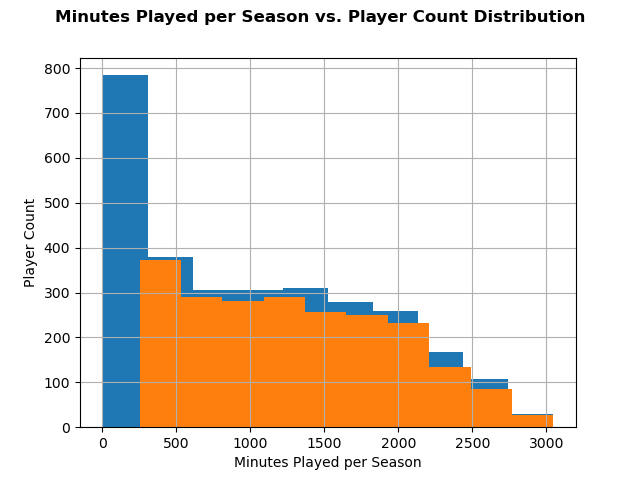

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0.98, 'Minutes Played per Season vs. Player Count Distribution')

Text(0.5, 0, 'Minutes Played per Season')

Text(0, 0.5, 'Player Count')

(2925, 28)

(2220, 28)

In [17]:
data1 = data[data.MP > 250]
data.MP.hist()
data1.MP.hist()
plt.suptitle("Minutes Played per Season vs. Player Count Distribution", fontsize=12, fontweight='bold')
plt.xlabel('Minutes Played per Season')
plt.ylabel('Player Count')

plt.savefig('distributions.png')

data.shape
data1.shape

In [94]:
# BPM Model
BPM_form = "BPM ~ Age + MP + Q('TS%') + Q('3PAr') + FTr + Q('ORB%') + Q('DRB%') + Q('AST%') + Q('STL%') + Q('BLK%') + Q('TOV%') + Q('USG%')"
BPM_model = smf.ols(formula = BPM_form, data = data1).fit()
BPM_model.summary()

residuals = BPM_model.resid
fitted = BPM_model.fittedvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BPM   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1100.
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        17:23:47   Log-Likelihood:                -3257.9
No. Observations:                2220   AIC:                             6542.
Df Residuals:                    2207   BIC:                             6616.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.5219      0.338    -66.593      0.000     -23.185     -21.859
Age            0.0471      0.006      8.431      0.000       0.036       0.058
MP             0.0007   3.74e-05     18.085      0.000       0.001       0.001
Q('TS%')      25.0093      0.507     49.334      0.000      24.015      26.003
Q('3PAr')      2.2056      0.177     12.427      0.000       1.858       2.554
FTr            0.3742      0.252      1.484      0.138      -0.120       0.869
Q('ORB%')      0.0601      0.012      4.824      0.000       0.036       0.085
Q('DRB%')      0.1136      0.006     19.932      0.000       0.102       0.125
Q('AST%')      0.1667      0.004     38.706      0.000       0.158       0.175
Q('STL%')      1.2228      0.042     29.147      0.000       1.141       1.305
Q('BLK%')      0.3469      0.020     17.744      0.000       0.309       0.385
Q('TOV%')     -0.2264      0.008    -28.575      0.000      -0.242      -0.211
Q('USG%')      0.0495      0.006      7.950      0.000       0.037       0.062
==============================================================================
Omnibus:                       40.131   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.684
Skew:                           0.248   Prob(JB):                     1.63e-11
Kurtosis:                       3.539   Cond. No.                     3.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

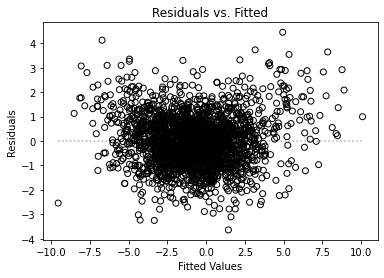

In [104]:
# Plotting Residuals
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
    
plt.show()

fig.savefig('residuals.png')

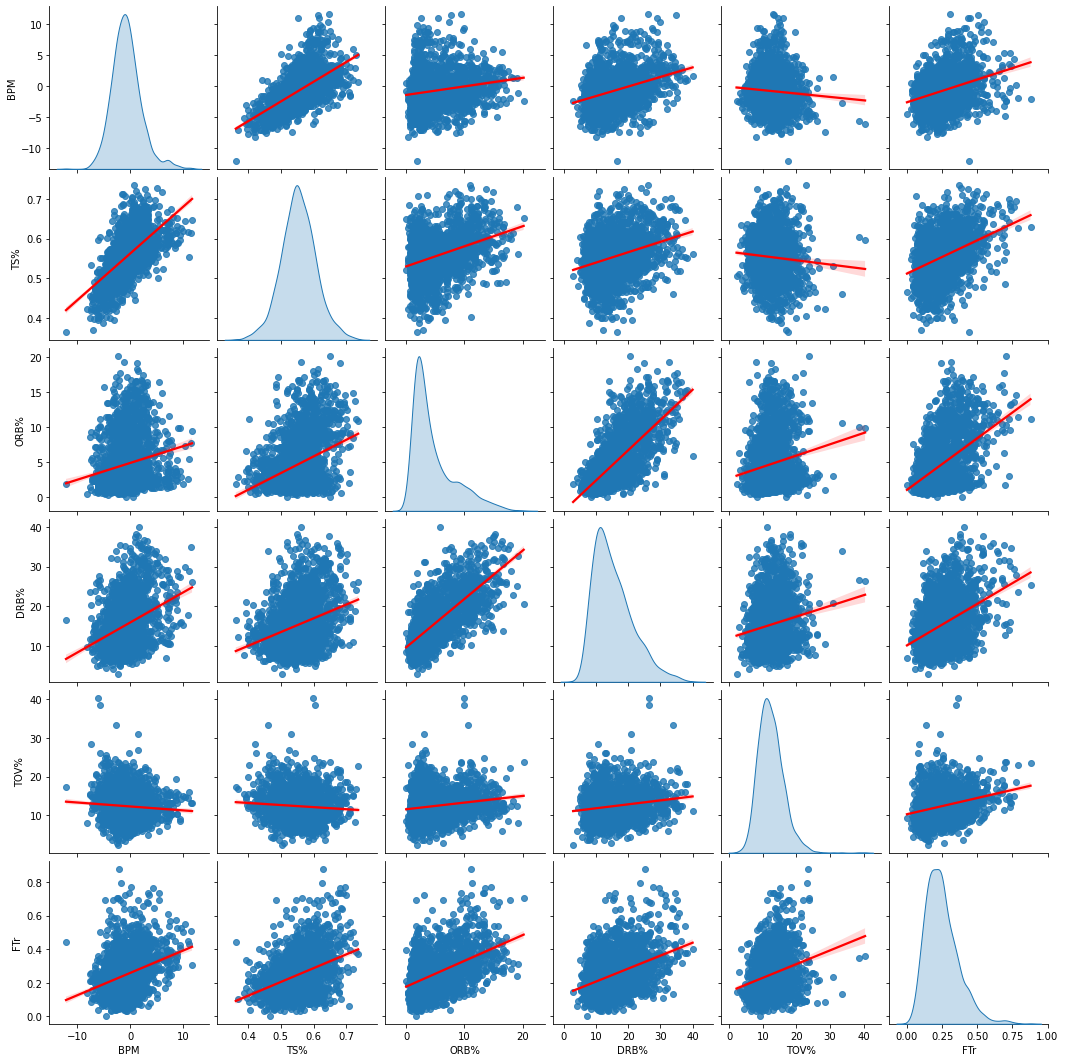

In [103]:
# Plotting Correlations of Four Factors
selected_data = data1[['BPM','TS%','ORB%','DRB%','TOV%','FTr']]
sns.pairplot(selected_data, diag_kind='kde', kind="reg", 
             plot_kws={'line_kws':{'color':'red'}}).savefig("matrixplot.png")